<a href="https://colab.research.google.com/github/BrouthenKamel/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing needed modules


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [ ]:
data_url = "https://drive.google.com/file/d/1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT/view?usp=share_link"
download_link = "https://drive.google.com/uc?export=download&id=1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT"
data_path = "/content/text_topics.csv"

In [ ]:
data = pd.read_csv(download_link)

### Discovering the dataset

In [ ]:
data.head()

,text,date,topics,id
0,Barbara Bailey is the queen of broadcast news ...,2020-09-04,['film_tv_&_video' 'news_&_social_concern'],1301943102094139393
1,start the 20-21 school year off POSITIVE! let’...,2020-09-05,['diaries_&_daily_life' 'youth_&_student_life'],1302275052256342017
2,Worth watching at least the 1st 10mins if I wa...,2020-09-06,['film_tv_&_video' 'news_&_social_concern'],1302450647422259205
3,There s regular people and then there s {@Bail...,2020-09-06,['celebrity_&_pop_culture'],1302452496011595776
4,"Up with new grace, truly sorry on behalf of {@...",2020-09-06,['celebrity_&_pop_culture' 'fitness_&_health' ...,1302479114469867520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1505 non-null   object
 1   date    1505 non-null   object
 2   topics  1505 non-null   object
 3   id      1505 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 47.2+ KB


### Exploring the features

In [ ]:
columns = data.columns
columns

Index(['text', 'date', 'topics', 'id'], dtype='object')

In [ ]:
data['topics'].unique()

### Constructing the target vector

In [ ]:
labels = []

In [ ]:
for label in data['topics'].values:
  label_string = label[1:-1].replace('\n', '')
  #print(label_string)
  label_list = [ category[1:-1] for category in label_string.split() ]
  labels.append(label_list)

In [ ]:
len(labels)

1505

In [ ]:
frequencies = dict()
for label_list in labels:
  for label in label_list:
    if label not in frequencies.keys():
      frequencies[label] = 1
    else:
      frequencies[label] += 1

In [ ]:
frequencies = dict(sorted(frequencies.items(), key=lambda x: x[1], reverse=True))

In [ ]:
frequencies

{'sports': 532,
 'music': 362,
 'news_&_social_concern': 289,
 'film_tv_&_video': 231,
 'celebrity_&_pop_culture': 210,
 'diaries_&_daily_life': 135,
 'business_&_entrepreneurs': 80,
 'other_hobbies': 70,
 'science_&_technology': 65,
 'gaming': 56,
 'relationships': 55,
 'fitness_&_health': 44,
 'arts_&_culture': 42,
 'fashion_&_style': 33,
 'family': 30,
 'learning_&_educational': 23,
 'food_&_dining': 22,
 'travel_&_adventure': 14,
 'youth_&_student_life': 11}

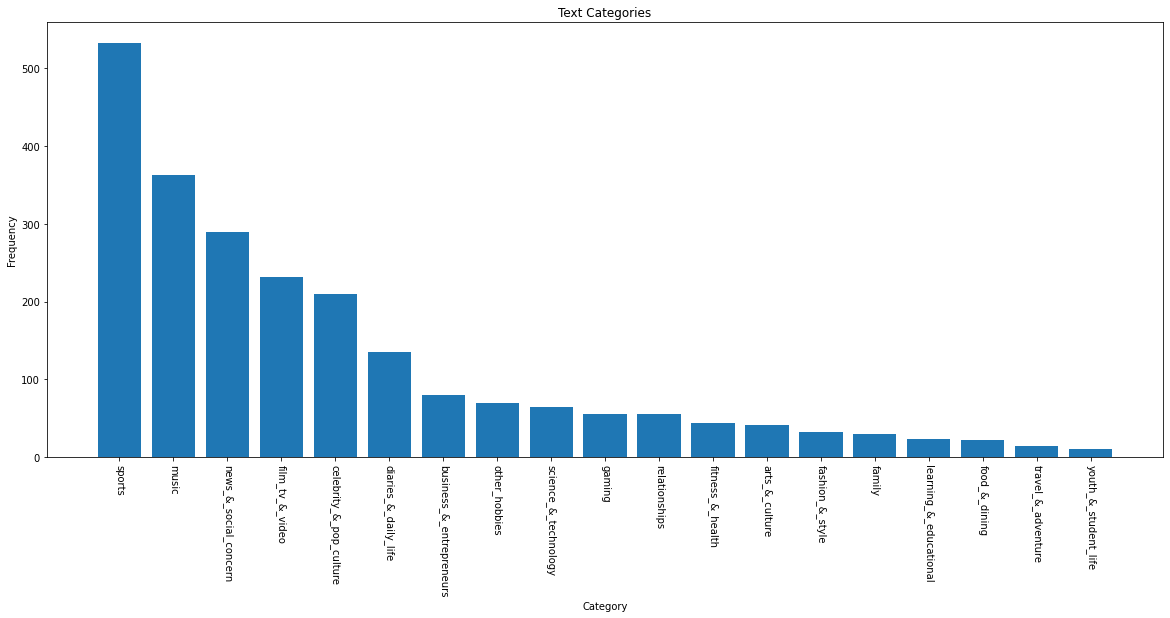

In [ ]:
plt.figure(figsize=(20, 8))

plt.bar(frequencies.keys(), frequencies.values(), width=0.8)

plt.title('Text Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.xticks(rotation=-90)

plt.show()

In [ ]:
topics_columns = dict()

for category in frequencies.keys():
  topic_column = []
  for data_point in labels:
    if category in data_point:
      topic_column.append(1)
    else:
      topic_column.append(0)
  topics_columns[category] = topic_column

In [ ]:
for category in frequencies.keys():
  data[category] = topics_columns[category]

In [ ]:
data.columns

Index(['text', 'date', 'topics', 'id', 'sports', 'music',
       'news_&_social_concern', 'film_tv_&_video', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'business_&_entrepreneurs', 'other_hobbies',
       'science_&_technology', 'gaming', 'relationships', 'fitness_&_health',
       'arts_&_culture', 'fashion_&_style', 'family', 'learning_&_educational',
       'food_&_dining', 'travel_&_adventure', 'youth_&_student_life'],
      dtype='object')

### The new dataset

In [ ]:
dataset = data.drop(columns = ['date', 'topics', 'id'] )

In [ ]:
dataset

,text,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,Barbara Bailey is the queen of broadcast news ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,start the 20-21 school year off POSITIVE! let’...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Worth watching at least the 1st 10mins if I wa...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,There s regular people and then there s {@Bail...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Up with new grace, truly sorry on behalf of {@...",0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Why don t I like {@James Corden@} #JamesCorden...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,HATS off to {@Jim Cantore@} and {@The Weather ...,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,The truth is the love is real..Even if everyon...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,HMU for Quality Assured Results; #essay due; #...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Feature Engineering

In [ ]:
dataset

,text,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,Barbara Bailey is the queen of broadcast news ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,start the 20-21 school year off POSITIVE! let’...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Worth watching at least the 1st 10mins if I wa...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,There s regular people and then there s {@Bail...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Up with new grace, truly sorry on behalf of {@...",0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Why don t I like {@James Corden@} #JamesCorden...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,HATS off to {@Jim Cantore@} and {@The Weather ...,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,The truth is the love is real..Even if everyon...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,HMU for Quality Assured Results; #essay due; #...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


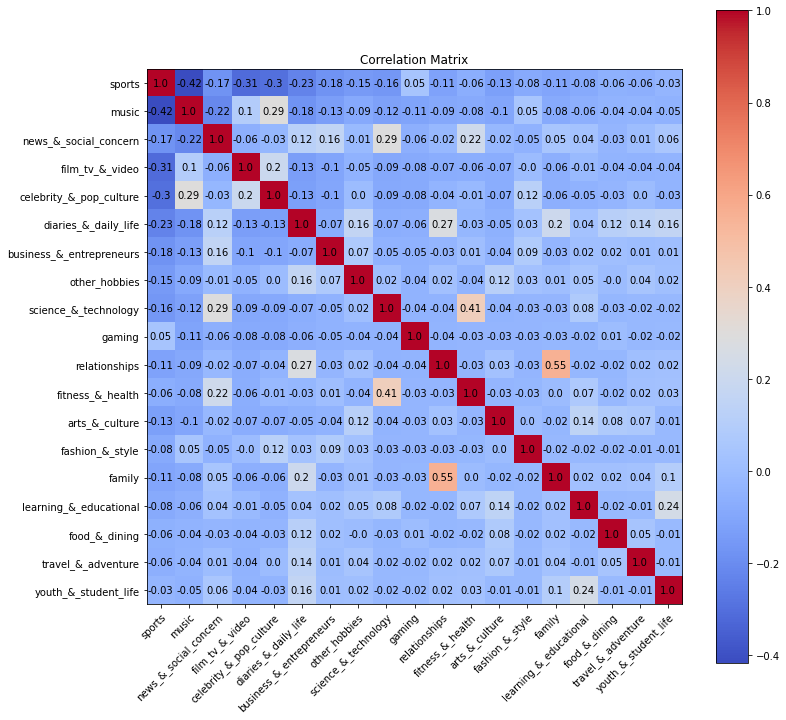

In [ ]:
corr_matrix = dataset.corr()

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(corr_matrix, cmap='coolwarm')

cbar = ax.figure.colorbar(im, ax=ax)

ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, np.round(corr_matrix.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

ax.set_title("Correlation Matrix")

plt.show()

In [ ]:
corr_matrix

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
sports,1.000000,-0.416131,-0.173462,-0.314862,-0.297765,-0.232116,-0.175201,-0.150113,-0.157100,0.045563,-0.114382,-0.062319,-0.125286,-0.082241,-0.105454,-0.080787,-0.055319,-0.057173,-0.030813
music,-0.416131,1.000000,-0.215154,0.096769,0.293818,-0.176660,-0.133343,-0.087384,-0.119566,-0.110635,-0.093034,-0.079208,-0.095353,0.053741,-0.080259,-0.057436,-0.042638,-0.038339,-0.048289
news_&_social_concern,-0.173462,-0.215154,1.000000,-0.057834,-0.025926,0.124420,0.155179,-0.011550,0.286439,-0.060190,-0.023027,0.215791,-0.021150,-0.049956,0.051162,0.035524,-0.031267,0.005476,0.057188
film_tv_&_video,-0.314862,0.096769,-0.057834,1.000000,0.200918,-0.133668,-0.100892,-0.050280,-0.090468,-0.083711,-0.073108,-0.062954,-0.072148,-0.000820,-0.060728,-0.007968,-0.036504,-0.041262,-0.036538
celebrity_&_pop_culture,-0.297765,0.293818,-0.025926,0.200918,1.000000,-0.126410,-0.095414,0.002118,-0.085556,-0.079165,-0.037550,-0.012971,-0.068230,0.123025,-0.057430,-0.050167,-0.033070,0.000929,-0.034554
diaries_&_daily_life,-0.232116,-0.176660,0.124420,-0.133668,-0.126410,1.000000,-0.074378,0.162544,-0.066693,-0.061712,0.273449,-0.026871,-0.053187,0.032389,0.204774,0.036713,0.116761,0.139135,0.164153
business_&_entrepreneurs,-0.175201,-0.133343,0.155179,-0.100892,-0.095414,-0.074378,1.000000,0.074245,-0.050340,-0.046580,-0.030362,0.011623,-0.040146,0.085869,-0.033791,0.018769,0.020496,0.007892,0.014440
other_hobbies,-0.150113,-0.087384,-0.011550,-0.050280,0.002118,0.162544,0.074245,1.000000,0.015160,-0.043419,0.024245,-0.038329,0.115830,0.031566,0.013649,0.049646,-0.000611,0.044332,0.018090
science_&_technology,-0.157100,-0.119566,0.286439,-0.090468,-0.085556,-0.066693,-0.050340,0.015160,1.000000,-0.041767,-0.041378,0.409376,-0.035998,-0.031811,-0.030300,0.080111,-0.025877,-0.020587,-0.018230
gaming,0.045563,-0.110635,-0.060190,-0.083711,-0.079165,-0.061712,-0.046580,-0.043419,-0.041767,1.000000,-0.038288,-0.034116,-0.033309,-0.029435,-0.028037,-0.024491,0.005306,-0.019050,-0.016869


In [ ]:
for category in corr_matrix.columns:
  print(f"The most correlated categories with {category} : ")
  for other in corr_matrix.drop(columns = [category]).columns:
    if corr_matrix.loc[category, other] > 0.1:
      print(f"-> {other} = {corr_matrix.loc[category, other]:.2f}") 
  print("\n")

The most correlated categories with sports : 


The most correlated categories with music : 
-> celebrity_&_pop_culture = 0.29


The most correlated categories with news_&_social_concern : 
-> diaries_&_daily_life = 0.12
-> business_&_entrepreneurs = 0.16
-> science_&_technology = 0.29
-> fitness_&_health = 0.22


The most correlated categories with film_tv_&_video : 
-> celebrity_&_pop_culture = 0.20


The most correlated categories with celebrity_&_pop_culture : 
-> music = 0.29
-> film_tv_&_video = 0.20
-> fashion_&_style = 0.12


The most correlated categories with diaries_&_daily_life : 
-> news_&_social_concern = 0.12
-> other_hobbies = 0.16
-> relationships = 0.27
-> family = 0.20
-> food_&_dining = 0.12
-> travel_&_adventure = 0.14
-> youth_&_student_life = 0.16


The most correlated categories with business_&_entrepreneurs : 
-> news_&_social_concern = 0.16


The most correlated categories with other_hobbies : 
-> diaries_&_daily_life = 0.16
-> arts_&_culture = 0.12


The most

In [ ]:
categories = dict()
for category in corr_matrix.columns:
  categories[category] = [ 0 for _ in range(len(corr_matrix.columns)) ]

for index, category in enumerate(corr_matrix.columns):
  for datapoint in dataset.drop(columns = ["text"]).values:
    if( datapoint[index] == 1 ):
      for other_index, other_category in enumerate(datapoint):
        if other_category == 1:
          categories[category][other_index] += 1

In [ ]:
correlations = pd.DataFrame(categories, index = corr_matrix.columns)

In [ ]:
correlations

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
sports,532,0,53,0,0,0,0,2,0,26,4,8,0,3,0,1,3,1,2
music,0,362,15,78,116,0,0,5,0,0,2,2,0,13,0,1,2,1,0
news_&_social_concern,53,15,289,32,35,47,36,12,47,4,8,30,6,2,10,7,2,3,5
film_tv_&_video,0,78,32,231,70,0,0,5,0,0,1,1,0,5,0,3,1,0,0
celebrity_&_pop_culture,0,116,35,70,210,0,0,10,0,0,4,5,0,14,0,0,1,2,0
diaries_&_daily_life,0,0,47,0,0,135,0,21,0,0,27,2,0,5,15,4,8,7,7
business_&_entrepreneurs,0,0,36,0,0,0,80,9,0,0,1,3,0,6,0,2,2,1,1
other_hobbies,2,5,12,5,10,21,9,70,4,0,4,0,8,3,2,3,1,2,1
science_&_technology,0,0,47,0,0,0,0,4,65,0,0,23,0,0,0,4,0,0,0
gaming,26,0,4,0,0,0,0,0,0,56,0,0,0,0,0,0,1,0,0


In [ ]:
correlations["sports"].drop("sports")

music                        0
news_&_social_concern       53
film_tv_&_video              0
celebrity_&_pop_culture      0
diaries_&_daily_life         0
business_&_entrepreneurs     0
other_hobbies                2
science_&_technology         0
gaming                      26
relationships                4
fitness_&_health             8
arts_&_culture               0
fashion_&_style              3
family                       0
learning_&_educational       1
food_&_dining                3
travel_&_adventure           1
youth_&_student_life         2
Name: sports, dtype: int64

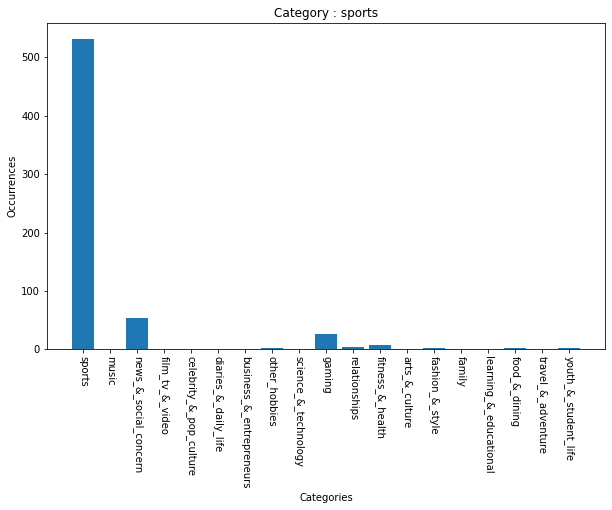

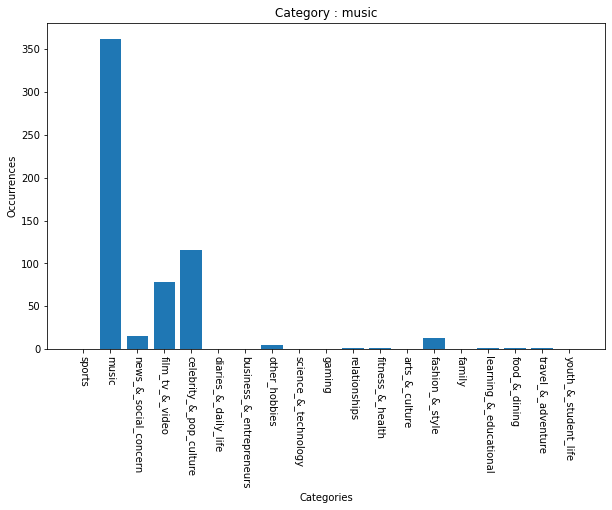

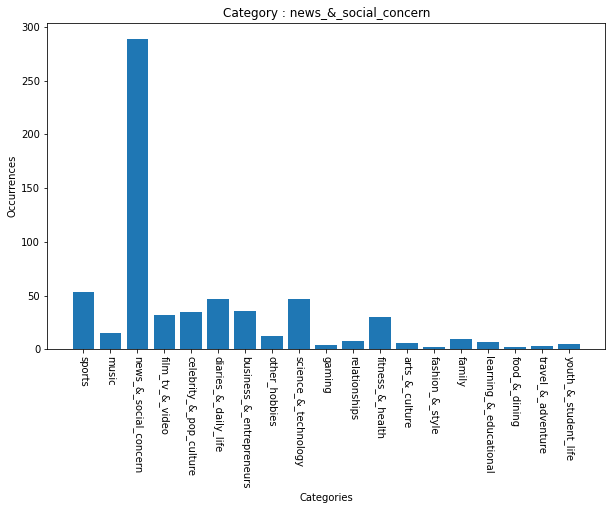

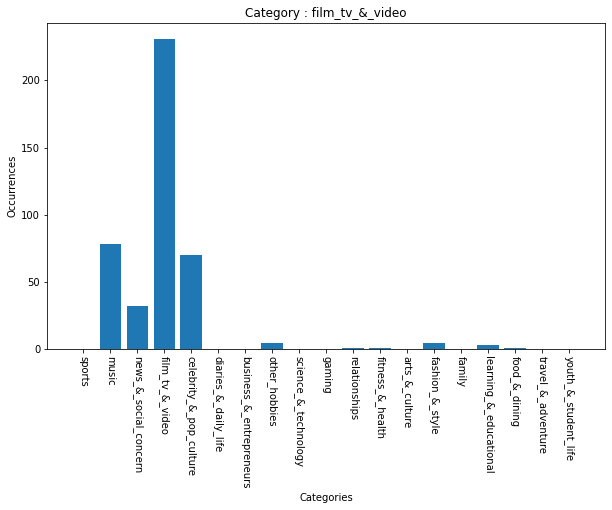

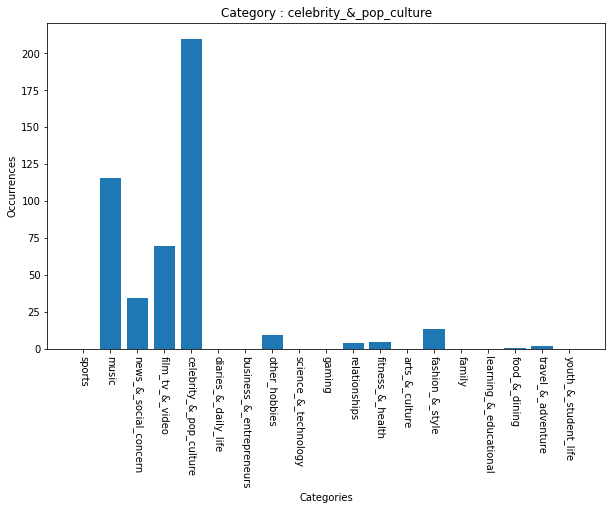

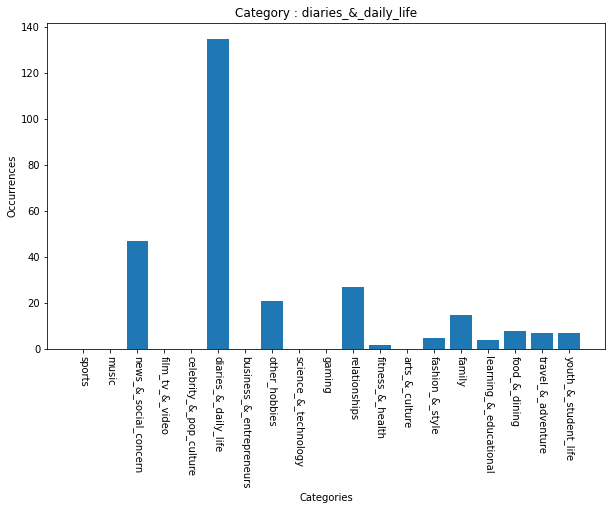

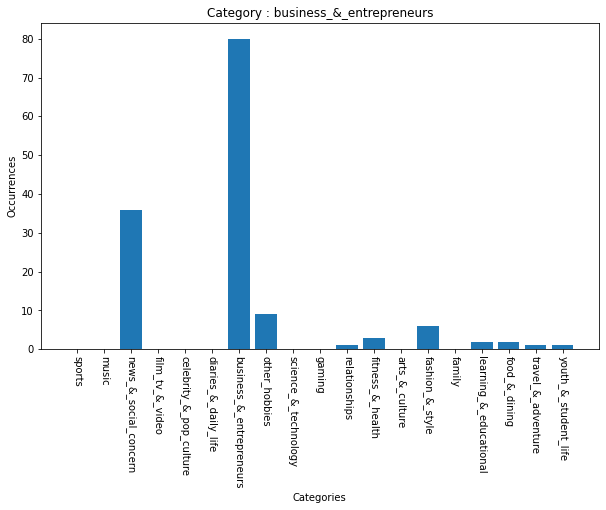

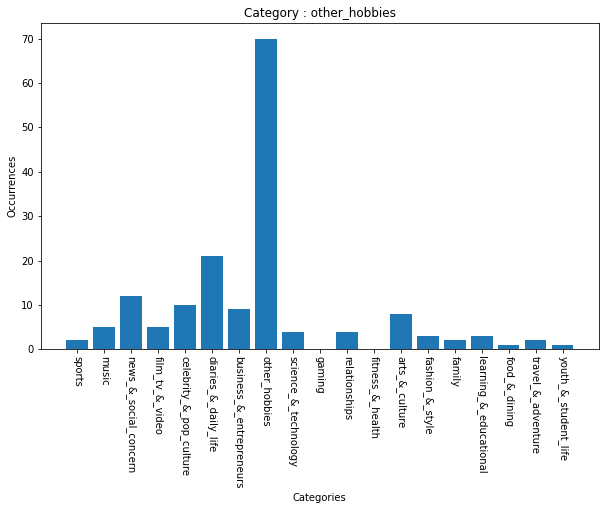

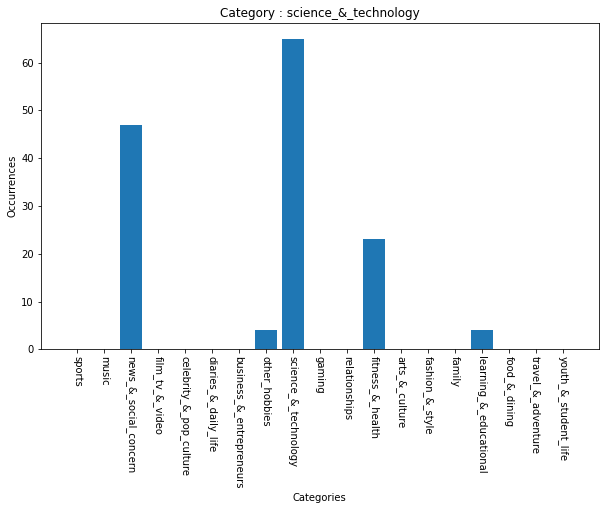

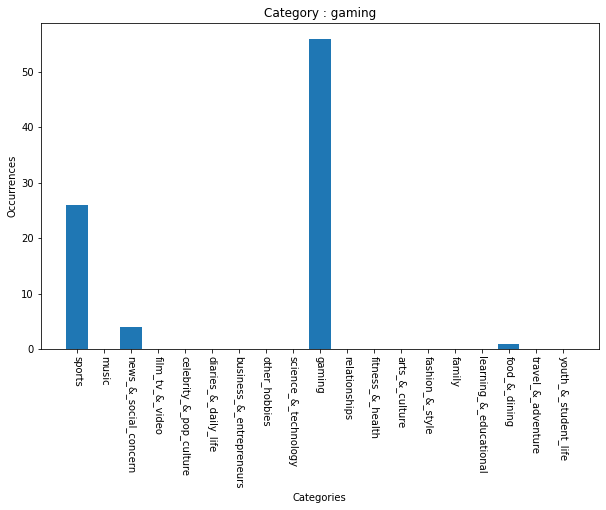

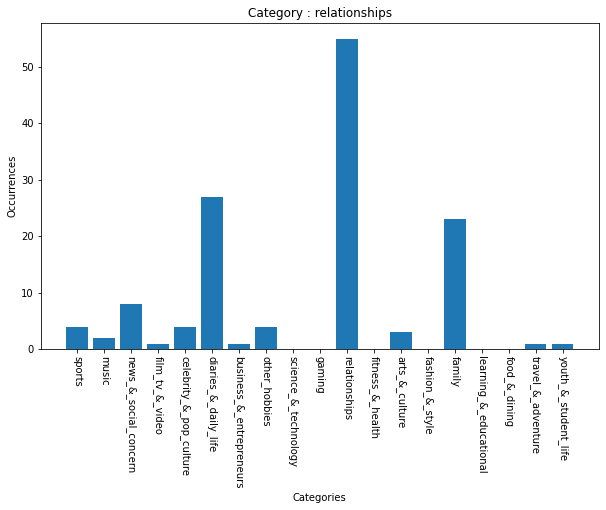

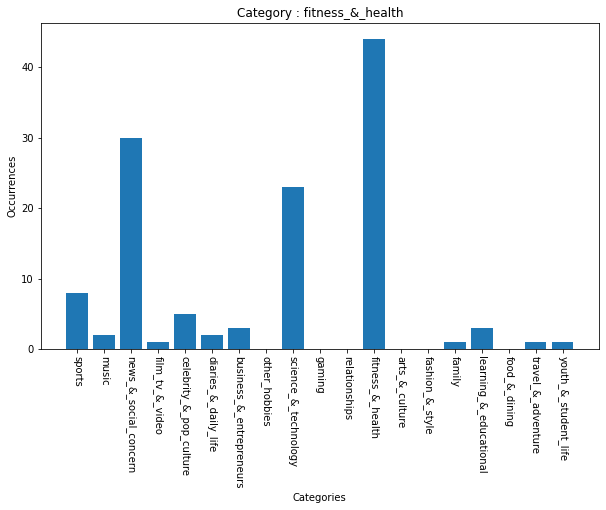

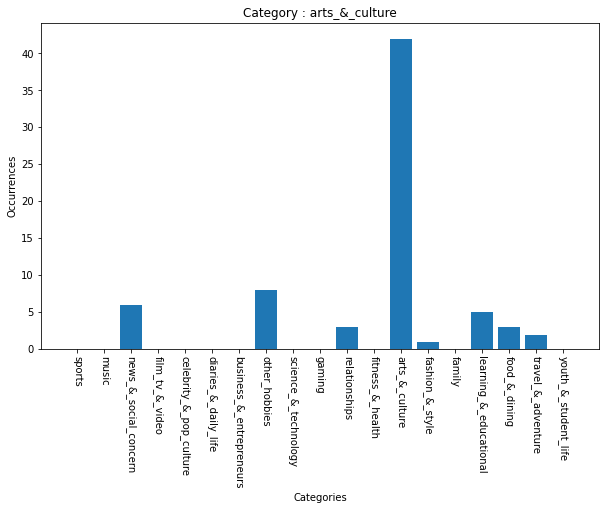

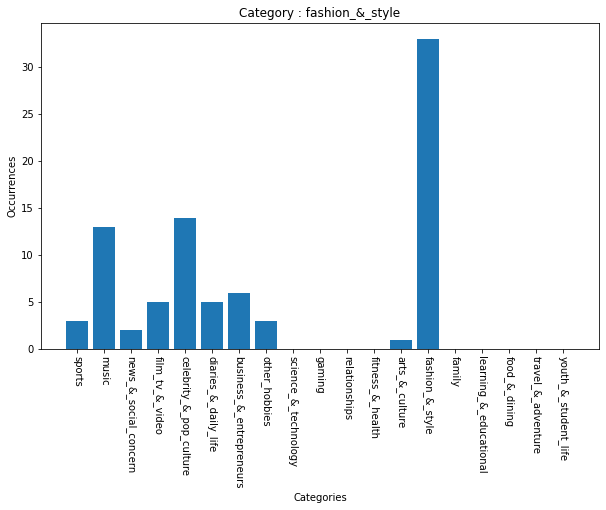

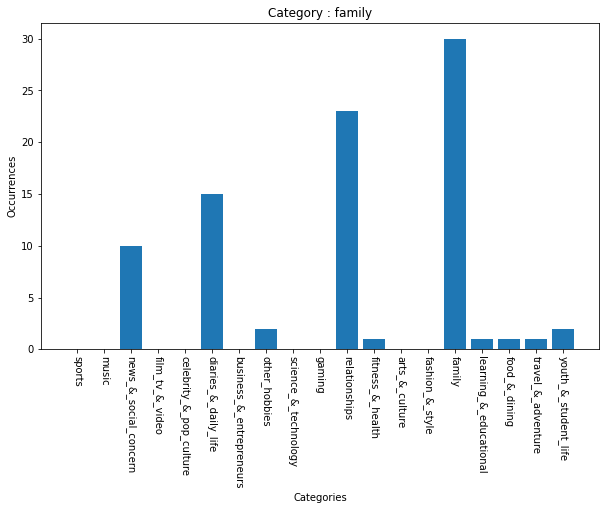

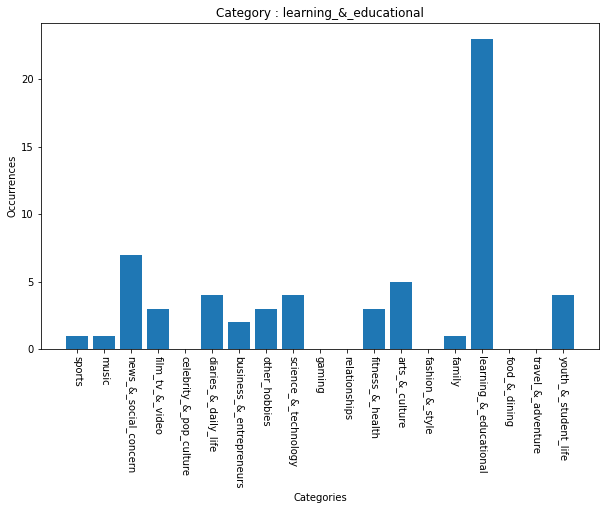

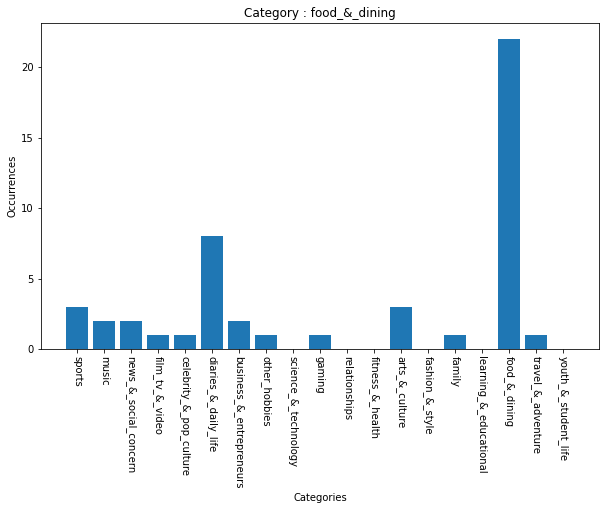

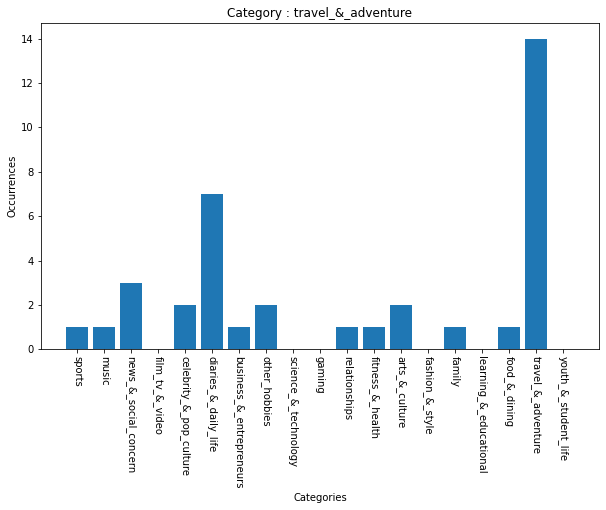

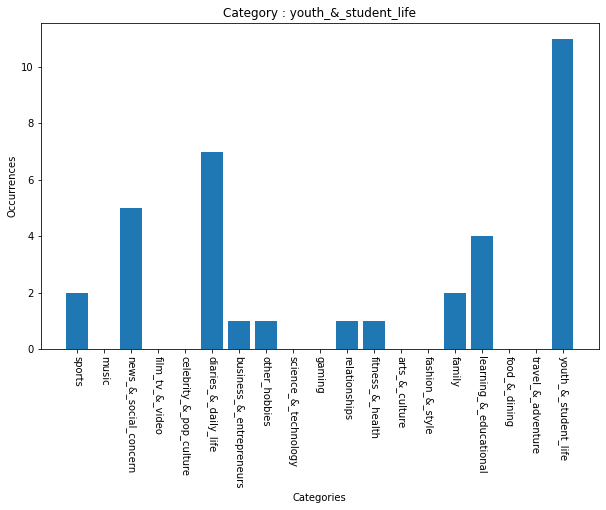

In [ ]:
for category in correlations.columns:
  fig, ax = plt.subplots(figsize = (10, 6))
  x = correlations.columns #.drop(columns = [category])
  y = correlations[category]#.drop(category)

  ax.bar(x, y)

  ax.set_xlabel("Categories")
  ax.set_ylabel("Occurrences")
  ax.set_title(f'Category : {category}')

  plt.xticks(rotation=-90)

  plt.show()

  print("\n")

### Data cleaning

Examinig potential cleaning steps

In [ ]:
dataset['text'].sample(n=10).values.tolist()

['Chikki was also evictd but she came back! Then y not Jasmin Bhasin {@Bigg Boss@} #BringJasminAsContestant',
 'White Kid Sing The Blues In Guitar Shop Like It s Nobody s Business! (BR... {{URL}} via {@YouTube@} I see a star.',
 'Hunter Renfroe just did what the {@Los Angeles Dodgers@} don’t do.....with two on and two outs he popped up.  The Dodgers get it done and get those runs home.  Just a different level of offensive baseball.  #worldseries',
 'Aye james harden was hardly on twitter during his rockets stint, went to Nets and was tweeting “Scary Hours” after every win…will he tweet again or will he go back to not being on twitter..lmao {@James Harden@}  #NBAPlayoffs #BucksVsNets',
 'I just earned the  God Save the Queen (Level 6)  badge on {{USERNAME}} ! {{URL}}',
 'di pa rin masyado nag ssink in sakin na James will release a new song  BUT I M SOOOO EXCITED!!  Congratulations {{USERNAME}} !  5DaysTo SODA Release #JamesReidSODA',
 'Two hot actions today and man of the match! {{USERN

In [ ]:
import re
import string

Removing Tags 

In [ ]:
def remove_tag(text):
    url = re.compile(r"({.*?}|\{\{.*?\}\})")
    return url.sub(r"", text)

In [ ]:
dataset['clean_text'] = dataset["text"].apply(remove_tag)

In [ ]:
dataset['clean_text'].sample(n=10).values.tolist()

['The greatest pleasure in life is doing what people say you cannot do. #LouDre } }',
 'Seriously   ? } Are you offended by the thought of Palestine or Black Lives Matter?',
 '2024 Freshman } out of Hesston HS played up this weekend with 785 Maroon.   Today he threw 8 TDs in 4 games against some of the best talent in the KC Metro, Iowa & Nebraska.  He will be one of the best 2024 QBs in the entire state of Kansas!',
 'Finally done with a Binge Act… Awe struck by the way Rani Bharti played her role to perfection  There is no iota of doubt that } bundle of talent and  deserve his space as well. Kudos to the entire cast  #MaharaniOnSonyLIV ',
 'spotify ww  #30 baila conmigo (+1) *2 meses*  OUT: dancing with the devil *2 dias* } } }',
 'Listen to the soundtrack for Judas and the Black Messiah on Boomplay  Featuring Nipsey Hussle, JAY-Z        & more } ',
 'Turned on the TV yesterday and was surprised to see  vs. Bruins from the 2017 playoffs. Launched the kids into a Go Sens Go chant. My s

Removing punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

In [ ]:
dataset['clean_text'] = dataset["clean_text"].apply(remove_punct)

In [ ]:
dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')

<ipython-input-38-f0fe9302765c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')


In [ ]:
dataset["clean_text"].sample(n=2).values

array(['Big sport day here    winning his 7th title then The Masters then the Giants American football  on the main TV  ATP Finals with Rafa at the O2  all today   ',
       'Leading from the front in their firstever Elite Group VijayHazareTrophy match Chandigarh captain  117 has scored a matchwinning second List A century to seal a 300run target against the likes of Yuzvendra Chahal Mohit Sharma and Rahul Tewatia'],
      dtype=object)

Removing stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

In [ ]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [ ]:
dataset['reduced_text'] = dataset["clean_text"].apply(remove_stopwords)

In [ ]:
dataset["reduced_text"].sample(n=4).values

array(['i’ll interviewing tomorrow 1230 est 1830 sast we’ll talking “96° shade” collection come join us',
       'jack box albuquerque nm',
       'parish eucharist building 930am online service available',
       'gbnews ha ha got tuned tv brilliant thank thank thank fantastic get stuffed real news channel shove antennas rear orifice'],
      dtype=object)

Keeping only Alphanumerical characters

In [ ]:
dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')

<ipython-input-45-c0916d6bb42c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')


In [ ]:
dataset['clean_text'].sample(n=4).values

array(['epic president trump slams horrible fox news hack chris wallace fox news interview video via fact turn tv wallace air',
       'feel like spicy chicken reason watching cowboys game',
       'take back summer  dominated airwaves',
       'omg greatest ever never emotional thank'], dtype=object)

### Check the vocabulary

In [ ]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(dataset["clean_text"])

In [ ]:
len(counter)

7371

In [ ]:
counter.most_common(10)

### Exploring statistical insights

In [ ]:
X = dataset["clean_text"]

In [ ]:
X

0       barbara bailey queen broadcast news central ea...
1       start  school year positive lets start thread ...
2       worth watching least st mins minister love  of...
3                         regular people queen everything
4       new grace truly sorry behalf dont endorse bad ...
                              ...                        
1500                 like jamescorden someone help figure
1501    hats team field tracking hurricaneida keeping ...
1502    truth love realeven everyone gangs yougod isnt...
1503    hmu quality assured results essay due pay writ...
1504    thinking everyone idas path friends please sta...
Name: clean_text, Length: 1505, dtype: object

In [ ]:
y = dataset.drop(columns = ['reduced_text', 'clean_text', 'text'])

In [ ]:
y

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
category_frequency = y.sum(axis=0)

In [ ]:
category_frequency[category_frequency > 200].index

Index(['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture'],
      dtype='object')

In [ ]:
high_freq_columns = ['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture']

In [ ]:
y_high_freq = y[high_freq_columns]

In [ ]:
y_high_freq

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture
0,0,0,1,1,0
1,0,0,0,0,0
2,0,0,1,1,0
3,0,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
1500,0,0,0,0,1
1501,0,0,1,1,1
1502,0,0,0,0,0
1503,0,0,0,0,0


### Splittng the dataset

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 10.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

In [ ]:
X_reshaped= X.values.reshape(-1, 1)
X_reshaped.shape

(1505, 1)

In [ ]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X_reshaped, y.values, test_size = 0.2)

In [ ]:
y_fractions = y_test.sum(axis=0) / y.sum(axis=0)
print(y_fractions)

sports                      0.199248
music                       0.198895
news_&_social_concern       0.200692
film_tv_&_video             0.199134
celebrity_&_pop_culture     0.200000
diaries_&_daily_life        0.200000
business_&_entrepreneurs    0.200000
other_hobbies               0.200000
science_&_technology        0.200000
gaming                      0.196429
relationships               0.254545
fitness_&_health            0.204545
arts_&_culture              0.190476
fashion_&_style             0.212121
family                      0.200000
learning_&_educational      0.217391
food_&_dining               0.181818
travel_&_adventure          0.142857
youth_&_student_life        0.181818
dtype: float64


In [ ]:
y_test_df = pd.DataFrame(y_test, columns = y.columns)

In [ ]:
y_train_df = pd.DataFrame(y_train, columns = y.columns)

In [ ]:
y_train_df[y_train_df["travel_&_adventure"] == 1].sample(n=5)

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
1020,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
428,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
929,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
925,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1199,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [ ]:
y_test_df[y_test_df["travel_&_adventure"] == 1].sum(axis = 0)

sports                      0
music                       0
news_&_social_concern       0
film_tv_&_video             0
celebrity_&_pop_culture     1
diaries_&_daily_life        1
business_&_entrepreneurs    0
other_hobbies               1
science_&_technology        0
gaming                      0
relationships               0
fitness_&_health            0
arts_&_culture              0
fashion_&_style             0
family                      0
learning_&_educational      0
food_&_dining               0
travel_&_adventure          2
youth_&_student_life        0
dtype: int64

In [ ]:
y_train_df.sum(axis=0)

sports                      426
music                       290
news_&_social_concern       231
film_tv_&_video             185
celebrity_&_pop_culture     168
diaries_&_daily_life        108
business_&_entrepreneurs     64
other_hobbies                56
science_&_technology         52
gaming                       45
relationships                41
fitness_&_health             35
arts_&_culture               34
fashion_&_style              26
family                       24
learning_&_educational       18
food_&_dining                18
travel_&_adventure           12
youth_&_student_life          9
dtype: int64

In [ ]:
subset = y_train_df[y_train_df["travel_&_adventure"] == 1].sample(frac=0.25, random_state=42)

In [ ]:
subset

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
1199,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1028,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
97,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_test_df = pd.concat([y_test_df, subset], ignore_index=True)

In [ ]:
y_train_df = y_train_df.drop(subset.index)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [ ]:
subset.index

Int64Index([1199, 1028, 97], dtype='int64')

In [ ]:
X_train_df.iloc[list(subset.index)]

,0
1199,tad embarrassed say hadnt yet s city center wo...
1028,called change departure time hours supervisor ...
97,nd time rubs cancel milan rd time lucky next y...


In [ ]:
X_test_df = pd.concat([X_test_df, X_train_df.iloc[list(subset.index)]], ignore_index = True)

In [ ]:
X_train_df = X_train_df.drop(subset.index)

In [ ]:
X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape

((1206, 1), (299, 1), (1206, 19), (299, 19))

In [ ]:
y_train = y_train_df.values
y_test = y_test_df.values
X_train = X_train_df.values
X_test = X_test_df.values

In [ ]:
y_fractions = y_test.sum(axis=0) / y.sum(axis=0)
print(y_fractions)

sports                      0.199248
music                       0.198895
news_&_social_concern       0.200692
film_tv_&_video             0.199134
celebrity_&_pop_culture     0.200000
diaries_&_daily_life        0.214815
business_&_entrepreneurs    0.200000
other_hobbies               0.200000
science_&_technology        0.200000
gaming                      0.196429
relationships               0.254545
fitness_&_health            0.204545
arts_&_culture              0.214286
fashion_&_style             0.212121
family                      0.200000
learning_&_educational      0.217391
food_&_dining               0.227273
travel_&_adventure          0.357143
youth_&_student_life        0.181818
dtype: float64


In [ ]:
y_train_df['travel_&_adventure'].sum(axis=0), y_test_df['travel_&_adventure'].sum(axis=0)

(9, 5)

### CONTINUE FROM HERE !

### Tokenization

In [ ]:
num_words = len(counter)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train) # fit only to training

AttributeError: ignored

In [ ]:
tokenizer.word_index

In [ ]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
for i in range(3):
  print(X_test.values[i], ' -> ', X_test_tokens[i])

In [ ]:
X

In [ ]:
word_lenghts = dict()

for text in X:
  if len(text) not in word_lenghts.keys():
    word_lenghts[str(len(text))] = 1
  else:
    word_lenghts[str(len(text))] += 1

In [ ]:
word_lenghts.keys()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_vector_length = 120

X_train_padded = pad_sequences(X_train_tokens, maxlen=input_vector_length, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_tokens, maxlen=input_vector_length, padding="post", truncating="post")

In [ ]:
X_train_padded.shape, X_test_padded.shape

### Building a base model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN

In [ ]:
model = Sequential([
    Embedding(num_words, 128, input_length=input_vector_length),
    SimpleRNN(64, activation='relu', dropout=0.1),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation="sigmoid")
])

In [ ]:
model = Sequential([
    Embedding(num_words, 64, input_length=input_vector_length),
    LSTM(64, activation='relu', dropout=0.1),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 128)          943488    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 958,085
Trainable params: 958,085
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002), metrics = ['accuracy'])

In [ ]:
model.evaluate(X_train_padded, y_train)

36/36 [==============================] - 2s 35ms/step - loss: 0.6947 - accuracy: 0.0213


[0.6946974396705627, 0.021276595070958138]

In [ ]:
model.evaluate(X_test_padded, y_test)

12/12 [==============================] - 1s 60ms/step - loss: 0.6944 - accuracy: 0.0212


[0.6944416761398315, 0.02122015878558159]

In [ ]:
model.fit(X_train_padded, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 4s 61ms/step - loss: 0.5632 - accuracy: 0.2589
Epoch 2/10
36/36 [==============================] - 2s 61ms/step - loss: 0.5053 - accuracy: 0.5168
Epoch 3/10
36/36 [==============================] - 2s 60ms/step - loss: 0.5116 - accuracy: 0.5168
Epoch 4/10
36/36 [==============================] - 3s 92ms/step - loss: 0.5048 - accuracy: 0.5168
Epoch 5/10
36/36 [==============================] - 2s 61ms/step - loss: 0.5051 - accuracy: 0.5168
Epoch 6/10
36/36 [==============================] - 2s 60ms/step - loss: 0.5045 - accuracy: 0.5168
Epoch 7/10
36/36 [==============================] - 2s 64ms/step - loss: 0.5047 - accuracy: 0.5168
Epoch 8/10
36/36 [==============================] - 2s 63ms/step - loss: 0.5048 - accuracy: 0.5168
Epoch 9/10
36/36 [==============================] - 3s 89ms/step - loss: 0.5042 - accuracy: 0.5168
Epoch 10/10
36/36 [==============================] - 2s 67ms/step - loss: 0.5045 - accuracy: 0.5168


### Evaluation

In [ ]:
model.evaluate(X_test_padded, y_test)

12/12 [==============================] - 0s 11ms/step - loss: 0.5101 - accuracy: 0.4907


[0.5100811719894409, 0.49071618914604187]

In [ ]:
prediction_probas = model.predict(X_test_padded)

12/12 [==============================] - 0s 11ms/step


In [ ]:
prediction_probas[:5]

array([[0.34102637, 0.3425781 , 0.24481767, 0.36180732, 0.20061451,
        0.23756592, 0.25775397, 0.28403974, 0.24819718, 0.11082066,
        0.11549637, 0.28655073, 0.18080357, 0.24159949, 0.01613196,
        0.22630493, 0.29409605, 0.10290245, 0.03147815],
       [0.34102637, 0.3425781 , 0.24481767, 0.3618073 , 0.20061451,
        0.23756592, 0.25775397, 0.28403974, 0.24819718, 0.11082066,
        0.11549637, 0.28655073, 0.18080357, 0.24159949, 0.01613196,
        0.22630493, 0.29409605, 0.10290245, 0.03147816],
       [0.34102637, 0.3425781 , 0.24481767, 0.36180732, 0.20061451,
        0.23756592, 0.25775397, 0.28403974, 0.24819718, 0.11082066,
        0.11549637, 0.28655073, 0.18080357, 0.24159949, 0.01613196,
        0.22630493, 0.29409605, 0.10290245, 0.03147815],
       [0.3410263 , 0.3425781 , 0.24481767, 0.36180732, 0.20061451,
        0.23756592, 0.25775397, 0.28403974, 0.24819718, 0.11082066,
        0.11549637, 0.28655073, 0.18080357, 0.24159949, 0.01613196,
        0.226

### Setting evaluation metric

In [ ]:
threshold = 0.5
predictions = []

for probas in prediction_probas:
  prediction = []
  for proba in probas:
    if proba > threshold:
      prediction.append(1)
    else:
      prediction.append(0)
  predictions.append(prediction)

In [ ]:
predictions[:3]

[[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
y_test.columns

Index(['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture'],
      dtype='object')

In [ ]:
y_test.shape

(377, 5)

In [ ]:
def metrics(y_test, predictions):
  accuracies = dict()
  recalls = dict()
  precisions = dict()
  f1_scores = dict()
  for columns_index in range(y_test.shape[1]):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    for data_point_index in range(y_test.shape[0]):
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 1):
        true_positives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 0):
        true_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 0):
        false_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 1):
        false_positives += 1
    accuracies[y_test.columns[columns_index]] = (true_positives + true_negatives) / y_test.shape[0]
    if (true_positives + false_negatives) == 0:
      recalls[y_test.columns[columns_index]] = 0
    else:
      recalls[y_test.columns[columns_index]] = true_positives / (true_positives + false_negatives)
    if (true_positives + false_positives) == 0:
      precisions[y_test.columns[columns_index]] = 0
    else:
      precisions[y_test.columns[columns_index]] = true_positives / (true_positives + false_positives)
    if ( recalls[y_test.columns[columns_index]] + precisions[y_test.columns[columns_index]] ) != 0:
      f1_scores[y_test.columns[columns_index]] = 2 * ( recalls[y_test.columns[columns_index]] * precisions[y_test.columns[columns_index]] ) / ( recalls[y_test.columns[columns_index]] + precisions[y_test.columns[columns_index]] )
    else:
      f1_scores[y_test.columns[columns_index]] = 0
  return accuracies, recalls, precisions, f1_scores

In [ ]:
accuracies, recalls, precisions, f1_scores = metrics(y_test, predictions)

In [ ]:
for column in y_test.columns:
  print(f"{column} => accuracy = {accuracies[column]:.2f} / recall = {recalls[column]:.2f} / precision = {precisions[column]:.2f} ")

sports => accuracy = 0.66 / recall = 0.00 / precision = 0.00 
music => accuracy = 0.75 / recall = 0.00 / precision = 0.00 
news_&_social_concern => accuracy = 0.79 / recall = 0.00 / precision = 0.00 
film_tv_&_video => accuracy = 0.87 / recall = 0.00 / precision = 0.00 
celebrity_&_pop_culture => accuracy = 0.84 / recall = 0.00 / precision = 0.00 


### Trying a Large Language Model : BERT

In [ ]:
dataset["clean_text"].sample(n = 4).values

array(['someone said enhypen running walking seriously power hold urghh borderdayone introwalktheline',
       'new podcast breaking ohio states playoff pursuit michigan talk course bunch recruiting',
       'smart informative piece would covid vaccine cause rare blood clots researchers found clues via',
       'nowplaying bb king freestyle lil wayne drake'], dtype=object)

In [ ]:
!pip install tensorflow-text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
import transformers

tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')

model = transformers.TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=y.shape[1])

batch_size = 64
learning_rate = 1e-4
num_epochs = 30

train_texts = list(X_train)
train_labels = y_train
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(len(train_labels)).batch(batch_size)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(train_dataset, epochs=num_epochs)

test_texts = list(X_test)
test_labels = y_test
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(batch_size)
test_outputs = model.predict(test_dataset)
test_predictions = tf.math.sigmoid(test_outputs.logits).numpy() > 0.5

print("Test predictions:", test_predictions)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: ignored

In [ ]:
tf.math.sigmoid(test_outputs.logits).numpy()

array([[0.5252498 , 0.00580616, 0.01404421, ..., 0.00452919, 0.00192224,
        0.00508433],
       [0.00206254, 0.992151  , 0.01024574, ..., 0.00670525, 0.00770631,
        0.00747674],
       [0.9936293 , 0.00223175, 0.00349879, ..., 0.001805  , 0.0020587 ,
        0.00205677],
       ...,
       [0.01037577, 0.00527617, 0.04407625, ..., 0.03174248, 0.0107643 ,
        0.01599196],
       [0.9990854 , 0.00397231, 0.506919  , ..., 0.00671979, 0.01427771,
        0.02514575],
       [0.018781  , 0.00557781, 0.10174015, ..., 0.02560962, 0.05191379,
        0.0388332 ]], dtype=float32)

In [ ]:
predictions = []

for prediction in test_predictions:
  prediction_vector = []
  for label in prediction:
    prediction_vector.append(1) if label else prediction_vector.append(0)
  predictions.append(prediction_vector)

In [ ]:
accuracies, recalls, precisions, f1_scores = metrics(y_test, predictions)

In [ ]:
for column in y_test.columns:
  print(f"{column} Evaluation :\n-> accuracy = {accuracies[column]:.2f} \n-> recall = {recalls[column]:.2f} \n-> precision = {precisions[column]:.2f} \n-> f1_scores = {f1_scores[column]:.2f}\n")

sports Evaluation :
-> accuracy = 0.95 
-> recall = 0.89 
-> precision = 0.95 
-> f1_scores = 0.92

music Evaluation :
-> accuracy = 0.92 
-> recall = 0.80 
-> precision = 0.88 
-> f1_scores = 0.84

news_&_social_concern Evaluation :
-> accuracy = 0.87 
-> recall = 0.68 
-> precision = 0.70 
-> f1_scores = 0.69

film_tv_&_video Evaluation :
-> accuracy = 0.86 
-> recall = 0.64 
-> precision = 0.48 
-> f1_scores = 0.55

celebrity_&_pop_culture Evaluation :
-> accuracy = 0.84 
-> recall = 0.29 
-> precision = 0.50 
-> f1_scores = 0.37

diaries_&_daily_life Evaluation :
-> accuracy = 0.92 
-> recall = 0.48 
-> precision = 0.45 
-> f1_scores = 0.47

business_&_entrepreneurs Evaluation :
-> accuracy = 0.97 
-> recall = 0.52 
-> precision = 0.85 
-> f1_scores = 0.65

other_hobbies Evaluation :
-> accuracy = 0.94 
-> recall = 0.15 
-> precision = 0.33 
-> f1_scores = 0.21

science_&_technology Evaluation :
-> accuracy = 0.97 
-> recall = 0.57 
-> precision = 0.93 
-> f1_scores = 0.70

gaming 